In [1]:
!pip install pandas

import pandas as pd
import numpy as np
import scipy
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

In [17]:
current_dir = os.getcwd()
data_folder_path = os.path.join(current_dir, 'mdl_logstore_standard_log')
data_file_path = os.path.join(data_folder_path, 'test_log.csv')
print(data_file_path)

df = pd.read_csv(data_file_path, sep=';')

C:\Users\Ксения\posHW\mdl_logstore_standard_log\test_log.csv


In [18]:
flag = 0
dataframes = []

for filename in os.listdir(data_folder_path):
    if filename.endswith('.csv') and flag <= 5: 
        flag += 1 
        file_path = os.path.join(data_folder_path, filename)
        df = pd.read_csv(file_path, sep=';')
        dataframes.append(df)
    else:
        break

combined_df = pd.concat(dataframes, ignore_index=True)

In [6]:
combined_df.columns

Index(['id', 'eventname', 'component', 'action', 'target', 'objecttable',
       'objectid', 'crud', 'edulevel', 'contextid', 'contextlevel',
       'contextinstanceid', 'userid', 'courseid', 'relateduserid', 'anonymous',
       'other', 'timecreated', 'origin', 'ip', 'realuserid'],
      dtype='object')

In [7]:
combined_df.dtypes

id                     int64
eventname             object
component             object
action                object
target                object
objecttable           object
objectid             float64
crud                  object
edulevel               int64
contextid              int64
contextlevel           int64
contextinstanceid      int64
userid                 int64
courseid               int64
relateduserid        float64
anonymous              int64
other                 object
timecreated            int64
origin                object
ip                    object
realuserid           float64
dtype: object

In [20]:
combined_df.drop(columns=['realuserid', 'other'], inplace=True)

In [21]:
combined_df.dropna(inplace=True)
df_changed = combined_df.copy()
df_changed['relateduserid'] = df_changed['relateduserid'].astype(int)
df_changed['objectid'] = df_changed['objectid'].astype(int)


#### Построение моделей и подготовка данных к обучению

In [10]:
!pip install keras

In [11]:
!pip install --upgrade scikit-learn --user

Requirement already up-to-date: scikit-learn in c:\users\ксения\appdata\roaming\python\python37\site-packages (1.0.2)


In [11]:
import torch
from torch.utils import data
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from torch import nn
import torch
from torch.utils import data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

In [12]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_changed[['eventname', 'component', 'action', 'target', 'objecttable', 'crud', 'contextlevel', 'origin']])

encoder = LabelEncoder()
encoded_ip = encoder.fit_transform(df_changed['ip'])
df_changed['encoded_ip'] = encoded_ip

columns = ['id', 'objectid', 'edulevel', 'contextid',
           'contextinstanceid', 'userid', 'courseid',
           'relateduserid', 'anonymous', 'timecreated', 'encoded_ip']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_changed[columns])

encoded_df = pd.concat([
    pd.DataFrame(encoded_features.toarray()),
    pd.DataFrame(data_scaled)], axis=1)

encoded_df

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.710789,-0.778111,0.994750,-0.369702,0.411135,1.130962,0.708804,0.0,-0.811137,-0.474434
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.710789,-0.778111,0.994750,-0.369702,0.411135,1.130962,0.709012,0.0,-0.811137,-0.474434
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.710789,-0.778111,0.994750,-0.369702,0.411135,1.130962,0.780201,0.0,-0.811137,-0.474434
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.710789,-0.778111,0.994750,-0.369702,0.411135,1.130962,0.816496,0.0,-0.811137,-0.474434
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.702165,-0.778111,0.994750,-0.369702,0.411135,1.130962,-2.071040,0.0,-0.811137,-0.474434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.562654,1.938477,1.264252,2.793249,2.174734,-0.805738,0.872108,0.0,1.329440,1.116572
75395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.562654,1.938477,1.264252,2.793249,2.174734,-0.805738,0.872108,0.0,1.329441,1.116572
75396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.562654,1.938477,1.264252,2.793249,2.174734,-0.805738,0.872108,0.0,1.329442,1.116572
75397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.562654,1.938477,1.264252,2.793249,2.174734,-0.805738,0.872108,0.0,1.329442,1.116572


In [13]:
encoded_df.columns = [f'col_{i}' for i in range(1, len(encoded_df.columns) + 1)]
encoded_df.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10',
       ...
       'col_131', 'col_132', 'col_133', 'col_134', 'col_135', 'col_136',
       'col_137', 'col_138', 'col_139', 'col_140'],
      dtype='object', length=140)

#### DBSCAN

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict clusters
cluster_labels = dbscan.fit_predict(encoded_df)

# Visualize the clustering results (e.g., 2D projection)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df)

KeyboardInterrupt: 

Estimated number of clusters: 521
Estimated number of noise points: 2147
Silhouette Coefficient: 0.543


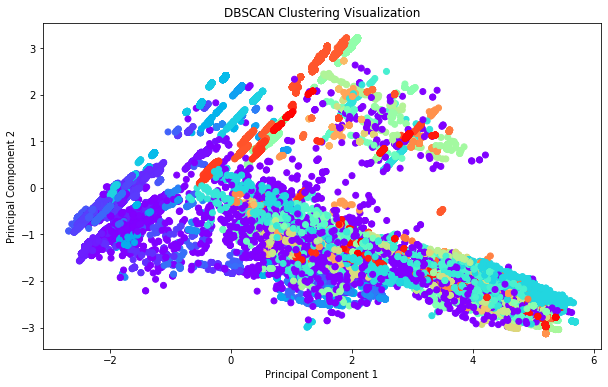

In [72]:
from sklearn import metrics

# Number of clusters in labels, ignoring noise if present.
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"Silhouette Coefficient: {metrics.silhouette_score(encoded_df, labels):.3f}")

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### OPTICS

In [68]:
import pandas as pd
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

optics.fit(encoded_df)

cluster_labels = optics.labels_
reachability_distances = optics.reachability_

plt.figure(figsize=(10, 6))
plt.plot(sorted(reachability_distances))
plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('OPTICS Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

KeyboardInterrupt: 